# Comparison CUTonalá and PVlib forecast using GFS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [3]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [4]:
#cec_module

In [5]:
#cec_inverter

In [6]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [7]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [8]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [9]:
losses = pvlib.pvsystem.pvwatts_losses(soiling=5, age=2)
losses

18.371877653851264

In [10]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=losses, 
                 name='Name of PV system: Huerto de Cutonalá')

In [11]:
system

PVSystem:
  name: Name of PV system: Huerto de Cutonalá
  surface_tilt: 25
  surface_azimuth: 180
  module: None
  inverter: None
  albedo: 0.2
  racking_model: open_rack
  module_type: glass_polymer
  temperature_model_parameters: {'a': -3.47, 'b': -0.0594, 'deltaT': 3}

In [12]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='no_loss')

In [13]:
mc

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [14]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#start_variable stand for a configurable variable for one given date
#end_variable stand for a configurable variable for one given end date
#days_before_today variable stands for an especific date before today

days_before_today = 3

start_variable = start - pd.Timedelta(days=days_before_today)
end_variable = start_variable + pd.Timedelta(days=1)

In [15]:
start_variable

Timestamp('2021-01-31 00:00:00-0600', tz='America/Mexico_City')

In [16]:
end_variable

Timestamp('2021-02-01 00:00:00-0600', tz='America/Mexico_City')

## Variables for files

In [17]:
study_day = '31'
month = 'Enero'

cutonala_real_data_file = './Real Data Cutonalá/Enero 18-31/2021-' + study_day + '-Enero.csv'
comparision_data_to_csv_date = './comparision data/' + study_day + '-' + month + '-2021-GFS'
metrics_data = './comparision data/' + study_day + '-' + month + '-2021-GFS-Metrics'

In [18]:

from pvlib.forecast import GFS, NAM, NDFD, RAP, HRRR

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [19]:
# Se define el modelo de pronostico
fm = GFS()
#fm = NAM()
#fm = NDFD()
#fm = RAP()
#fm = HRRR()

In [20]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start_variable, end_variable)

In [21]:
#pd.set_option('display.max_columns', None)
#forecast_data.head()

In [22]:
forecast_data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2021-01-31 06:00:00-06:00,13.017700,1.765267,0.000000,0.000000,0.000000,3.0,0.0,0.0,3.0
2021-01-31 09:00:00-06:00,10.297089,1.478901,257.289784,521.989845,89.387631,0.0,0.0,0.0,0.0
2021-01-31 12:00:00-06:00,9.855591,1.390655,766.775658,784.013202,175.905089,0.0,0.0,0.0,0.0
2021-01-31 15:00:00-06:00,19.167969,0.484393,682.616134,777.886292,150.883127,0.0,0.0,0.0,0.0
2021-01-31 18:00:00-06:00,38.450958,1.661692,79.266045,158.810640,55.065234,0.0,0.0,0.0,0.0
2021-01-31 21:00:00-06:00,38.152832,1.681641,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2021-02-01 00:00:00-06:00,24.585236,2.338120,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [23]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [24]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [25]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [26]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2021-01-31 06:00:00-06:00,-1.292470e-26,0.000000,-1.292470e-26,0.000000,-0.000000,-1.292470e-26,-1.292470e-26
2021-01-31 09:00:00-06:00,2.618640e+01,857.840980,2.466675e+01,730.185389,18011.298019,2.599136e+01,1.921956e+01
2021-01-31 12:00:00-06:00,6.984999e+01,839.212368,6.521061e+01,676.137401,44091.331110,6.934185e+01,4.632297e+01
2021-01-31 15:00:00-06:00,6.326333e+01,812.886449,5.891871e+01,654.507223,38562.718390,6.281709e+01,4.215141e+01
2021-01-31 18:00:00-06:00,7.941886e+00,752.695756,7.425884e+00,639.280181,4747.220737,7.890161e+00,5.914118e+00
2021-01-31 21:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2021-02-01 00:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00


In [27]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2021-01-31 06:00:00-06:00,-1.292470e-26,0.000000,-1.292470e-26,0.000000,-0.000000,-1.292470e-26,-1.292470e-26
1,2021-01-31 09:00:00-06:00,2.618640e+01,857.840980,2.466675e+01,730.185389,18011.298019,2.599136e+01,1.921956e+01
2,2021-01-31 12:00:00-06:00,6.984999e+01,839.212368,6.521061e+01,676.137401,44091.331110,6.934185e+01,4.632297e+01
3,2021-01-31 15:00:00-06:00,6.326333e+01,812.886449,5.891871e+01,654.507223,38562.718390,6.281709e+01,4.215141e+01
4,2021-01-31 18:00:00-06:00,7.941886e+00,752.695756,7.425884e+00,639.280181,4747.220737,7.890161e+00,5.914118e+00
5,2021-01-31 21:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
6,2021-02-01 00:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00


In [28]:
droped_forecas_data = forecast_dc.drop([0,5,6])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0   2021-01-31 09:00:00-06:00
1   2021-01-31 12:00:00-06:00
2   2021-01-31 15:00:00-06:00
3   2021-01-31 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [29]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0    18011.298019
1    44091.331110
2    38562.718390
3     4747.220737
Name: p_mp, dtype: float64

## Retrieving real data

In [30]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
real_data_cut = pd.read_csv(cutonala_real_data_file)

In [31]:
real_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
0,3.600160e+11,03M172129A80,31/01/2021 07:15,group1/device4,273.23,261.23,271.98,1.55,1.57,1.46,55.40,126.41,406.02,0.11,559.79,473.96,0.21,0.03,115.25,8.33,0,0.03
1,3.600160e+11,03M172129A80,31/01/2021 07:30,group1/device4,288.42,282.07,286.99,2.18,2.43,2.29,60.01,391.55,0.00,-0.13,683.96,634.41,0.39,0.20,268.00,126.44,0,0.12
2,3.600160e+11,03M172129A80,31/01/2021 07:45,group1/device4,288.29,281.98,286.92,2.47,2.74,2.63,60.01,1112.78,0.00,-0.18,744.90,728.61,0.97,0.55,726.67,395.11,0,0.40
3,3.600160e+11,03M172129A80,31/01/2021 08:00,group1/device4,287.85,281.56,286.67,2.96,3.28,3.25,60.01,1888.11,0.00,-0.13,764.07,768.85,1.67,0.82,1269.90,627.78,0,0.87
4,3.600160e+11,03M172129A80,31/01/2021 08:15,group1/device4,287.66,281.55,286.59,4.83,5.17,5.33,60.03,3874.00,0.33,-0.13,770.07,753.64,3.35,1.79,2582.33,1322.44,0,1.82
5,3.600160e+11,03M172129A80,31/01/2021 08:30,group1/device4,287.27,281.01,286.28,10.96,11.25,11.63,59.99,9437.45,1.11,0.13,756.19,714.19,6.91,6.07,5220.89,4328.44,0,4.17
6,3.600160e+11,03M172129A80,31/01/2021 08:45,group1/device4,287.56,281.14,286.70,14.87,15.15,15.53,60.01,12835.88,1.79,0.00,745.06,706.99,9.07,8.83,6760.11,6243.34,0,7.37
7,3.600160e+11,03M172129A80,31/01/2021 09:00,group1/device4,286.66,280.19,285.91,18.11,18.24,18.81,60.02,15549.66,-1.79,0.07,730.87,700.77,11.11,10.91,8121.23,7645.55,0,11.25
8,3.600160e+11,03M172129A80,31/01/2021 09:15,group1/device4,285.52,278.66,284.32,21.23,21.31,22.04,60.00,18150.59,-1.07,0.10,720.74,691.84,13.16,12.91,9490.36,8937.39,0,15.54
9,3.600160e+11,03M172129A80,31/01/2021 09:30,group1/device4,266.55,260.12,265.42,22.83,22.89,23.60,56.00,19512.89,0.89,-0.16,660.41,633.04,14.42,14.23,10205.23,9656.00,0,20.26


In [32]:
droped_data_cut = real_data_cut.drop([0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47])
droped_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
7,3.600160e+11,03M172129A80,31/01/2021 09:00,group1/device4,286.66,280.19,285.91,18.11,18.24,18.81,60.02,15549.66,-1.79,0.07,730.87,700.77,11.11,10.91,8121.23,7645.55,0,11.25
19,3.600160e+11,03M172129A80,31/01/2021 12:00,group1/device4,286.53,279.62,285.02,41.26,41.42,42.24,60.02,35363.23,6.67,0.16,638.00,610.04,29.03,28.98,18533.67,17688.67,0,95.66
31,3.600160e+11,03M172129A80,31/01/2021 15:00,group1/device4,285.75,277.95,283.91,35.23,35.31,36.10,59.99,30047.11,2.11,0.00,635.73,611.51,24.66,24.62,15688.11,15066.00,0,199.76
43,3.600160e+11,03M172129A80,31/01/2021 18:00,group1/device4,285.34,276.47,282.30,2.74,2.98,3.02,60.01,1566.45,0.00,-0.07,712.01,697.03,1.36,0.91,966.78,630.56,0,247.85


In [33]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0    15549.66
1    35363.23
2    30047.11
3     1566.45
Name: Pac(W), dtype: float64

In [34]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2021-01-31 09:00:00-06:00,15549.66,18011.298019
1,2021-01-31 12:00:00-06:00,35363.23,44091.331110
2,2021-01-31 15:00:00-06:00,30047.11,38562.718390
3,2021-01-31 18:00:00-06:00,1566.45,4747.220737


In [35]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2021-01-31 09:00:00-06:00,15549.66,18011.298019
2021-01-31 12:00:00-06:00,35363.23,44091.331110
2021-01-31 15:00:00-06:00,30047.11,38562.718390
2021-01-31 18:00:00-06:00,1566.45,4747.220737


In [36]:
comparision_to_csv = comparision.to_csv(comparision_data_to_csv_date, index=False)

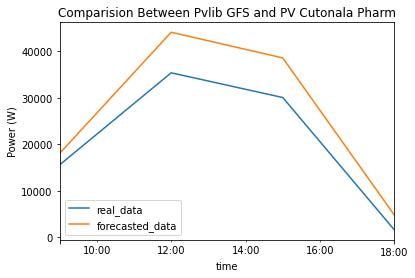

In [37]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib GFS and PV Cutonala Pharm');

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [38]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [39]:
real = comparision['real_data']
real

time
2021-01-31 09:00:00-06:00    15549.66
2021-01-31 12:00:00-06:00    35363.23
2021-01-31 15:00:00-06:00    30047.11
2021-01-31 18:00:00-06:00     1566.45
Name: real_data, dtype: float64

In [40]:
forecasted = comparision['forecasted_data']
forecasted

time
2021-01-31 09:00:00-06:00    18011.298019
2021-01-31 12:00:00-06:00    44091.331110
2021-01-31 15:00:00-06:00    38562.718390
2021-01-31 18:00:00-06:00     4747.220737
Name: forecasted_data, dtype: float64

In [41]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:41218074.8653869
RMSE:6420.1304399043875
MSLE:0.34022044526276646
RMSLE:0.5832841891074766
MAE:5721.529564225856


In [42]:
MSE = mean_squared_error(forecasted, real)
RMSE = np.sqrt(mean_squared_error(forecasted, real))
MSLE = mean_squared_log_error(forecasted, real)
RMSLE = np.sqrt(mean_squared_log_error(forecasted, real))
MAE = mean_absolute_error(forecasted, real)

In [43]:
metrics_obj = {'MSE': [MSE], 'RMSE':[RMSE], 'MSLE':[MSLE], 'RMSLE':[RMSLE], 'MAE':[MAE]}
metrics_df = pd.DataFrame(metrics_obj)
metrics_df

,MSE,RMSE,MSLE,RMSLE,MAE
0,4.121807e+07,6420.13044,0.34022,0.583284,5721.529564


In [44]:
metrics_df.to_csv(metrics_data, index=False)